In [1]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
def vis_kmeans(x, mus):
    fig, ax = plt.subplots(figsize = (10,3))
    # draw lines
    xmin = 0 # np.min(x) - 1/2 * x.std()
    xmax = np.max(x) + 1/2 * x.std() 
    y = 0
    height = 1

    ax.hlines(y, xmin, xmax)
    ax.vlines(xmin, y - height, y + height )
    ax.vlines(xmax, y - height, y + height )
    ax.set_ylim([-height - 2, height + 2])
    # draw a point on the line
    difmu = 0
    dif = 0
    k = 1
    for i, px in enumerate(x):
        if (i>0) & (np.abs(px - x[i-1]) < 0.2):
            k *= -1
            dif += 0.27
        ax.plot(px, y, 'x', ms = 10, mfc = 'r')
        ax.text(px - 0.08, -1.1 + k * dif, px)
    for i, mu in enumerate(mus):
        if np.abs(mu - mus[i-1]) < 1:
            difmu += 0.5
        ax.plot(mu, y, 's', ms = 5, mfc = 'r')
        ax.text(mu - 0.08, 1.7 - difmu , f'$\mu_{i}=${mu}')


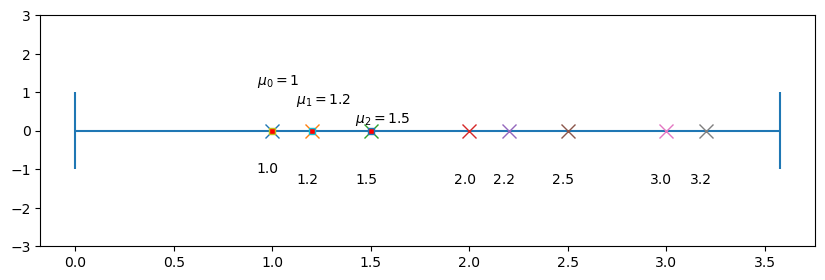

In [3]:
x =  np.array([1, 1.2, 1.5, 2, 2.2, 2.5, 3, 3.2])
mus = [1, 1.2, 1.5]
vis_kmeans(x, mus)

In [6]:
from sklearn.cluster import KMeans

def kmeans_1d(x, k, init=None):
    """
    assigns cluster to values in a 1d array
    -----------------------------------------
    parameters:
    -----------
    x = list of values to cluster
    k = number of clusters
    init = values to initialize clusters at
    """
    x = np.array(x).reshape(-1, 1)
    if init == None:
        kmeans = KMeans(n_clusters=k).fit(x)
    else:
        init = np.array(init).reshape(-1, 1)
        kmeans = KMeans(n_clusters=k, init=init).fit(x)

    clusters = kmeans.predict(x)

    centers = []

    for c in np.unique(clusters):
        centers.append(np.mean(x[clusters == c]))

    centers = np.round(centers, 4)
    print("The assigned clusters are: {}".format(clusters))
    print(
        "The cluster centers of the converged k-means algortihm is: {}".format(
            centers
        )
    )
    return None

In [7]:
x = [1, 1.2, 1.5, 2, 2.2, 2.5, 3, 3.2]
mus = 3
init = [1, 1.2, 1.5]
kmeans_1d(x, mus, init)

C:\Users\Usuario\dtu\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Usuario\dtu\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


The assigned clusters are: [0 1 1 2 2 2 2 2]
The cluster centers of the converged k-means algortihm is: [1.   1.35 2.58]


C:\Users\Usuario\dtu\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
